In [1]:
from deepchecks.base import Dataset
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from deepchecks.checks import UnusedFeatures
import pandas as pd

## Load data

The dataset is the adult dataset which can be downloaded from the UCI machine learning repository.

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [2]:
from urllib.request import urlopen
from sklearn.preprocessing import LabelEncoder

name_data = urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names')
lines = [l.decode("utf-8") for l in name_data if ':' in l.decode("utf-8") and '|' not in l.decode("utf-8")]

features = [l.split(':')[0] for l in lines]
label_name = 'income'

cat_features = [l.split(':')[0] for l in lines if 'continuous' not in l]

train_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names=features + [label_name])
test_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                      names=features + [label_name], skiprows=1)

test_df[label_name] = test_df [label_name].str[:-1]

encoder = LabelEncoder()
encoder.fit(train_df[label_name])
train_df[label_name] = encoder.transform(train_df[label_name])
test_df[label_name] = encoder.transform(test_df[label_name])

## Create datasets

In [3]:
from deepchecks import Dataset

cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                'race', 'sex', 'native-country']
train_ds = Dataset(train_df, label_name=label_name, cat_features=cat_features)
test_ds = Dataset(test_df, label_name=label_name, cat_features=cat_features)

numeric_features = list(set(train_ds.features) - set(cat_features))


## Classification model

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

numeric_transformer = SimpleImputer()
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OrdinalEncoder())]
)

train_ds.features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

model = Pipeline(steps=[("preprocessing", preprocessor), ("model", RandomForestClassifier(max_depth=5, n_jobs=-1))])
model = model.fit(train_ds.features_columns, train_ds.label_col)

In [5]:
# NBVAL_SKIP
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['education-num', 'fnlwgt',
                                                   'capital-loss',
                                                   'hours-per-week',
                                                   'capital-gain', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                              

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

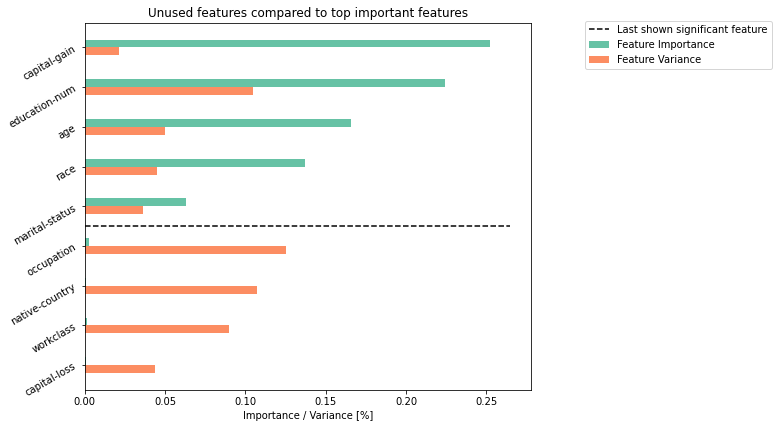

In [6]:
UnusedFeatures().run(train_ds, test_ds, model)

#### stricter threshold on what features are considered "high variance"

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

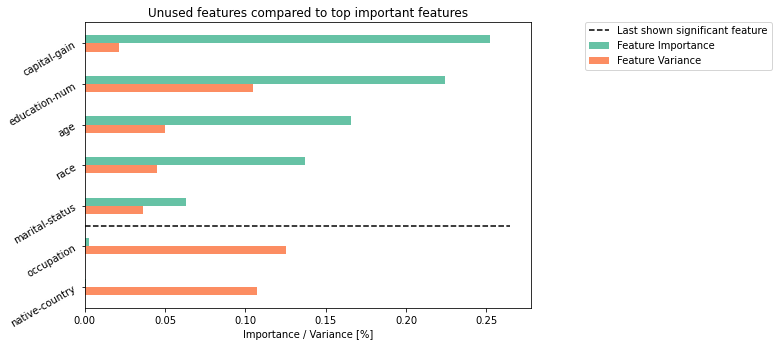

In [7]:
UnusedFeatures(feature_variance_threshold=1.5).run(train_ds, test_ds, model)

#### All features are considered important

In [8]:
UnusedFeatures(feature_importance_threshold=0).run(train_ds, test_ds, model)

Unused Features

Detect features that are nearly unused by the model.

✓ Nothing found